<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Ali Ghelichkhani
### Student Number : 
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
import warnings
warnings.filterwarnings('ignore')

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [33]:
heart_disease_df = pd.read_csv("./heart_disease.csv")
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
heart_disease_df['target'] = heart_disease_df['target'].replace([0],-1)
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,-1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,-1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,-1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,-1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,-1


In [35]:
from sklearn.model_selection import train_test_split


y = heart_disease_df["target"]
X = heart_disease_df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Adaboost Algorithm Implementation (40 points)

In [44]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    return (sum(w*(np.not_equal(y, y_pred)).astype(int)))/sum(w)
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1 - error) / error)
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    return w * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                w = np.ones(len(y)) * 1 / len(y)
            else:
                w = update_weights(w, alpha_m, y, y_pred)
            
            G_m = DecisionTreeClassifier(max_depth=1)
            G_m.fit(X, y, sample_weight = w)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m)

            error_m = calculate_error(y, y_pred, w)
            self.training_errors.append(error_m)

            alpha_m = calculate_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)


    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

#TODO : Fit model

ada = AdaBoost()
ada.fit(X_train, y_train, M=300)

#TODO : Predict on test data
y_pred = ada.predict(X_test)

#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
print(f"Accuracy of Our Ada Boost Classifier is {accuracy_score(y_test, y_pred)}")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}")

Accuracy of Our Ada Boost Classifier is 0.926829268292683
Classification Report : 
               precision    recall  f1-score   support

          -1       0.92      0.93      0.92        98
           1       0.93      0.93      0.93       107

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=300, algorithm="SAMME", learning_rate=1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)


print(f"Accuracy of SK Ada Boost Classifier is {accuracy_score(y_test, y_pred)}")
print(f"Classification Report : \n {classification_report(y_test, y_pred)}")

Accuracy of SK Ada Boost Classifier is 0.926829268292683
Classification Report : 
               precision    recall  f1-score   support

          -1       0.92      0.93      0.92        98
           1       0.93      0.93      0.93       107

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



### Early Stopping (15 points)

In [51]:
#TODO : Calculate validation error for different number of estimators 
from sklearn.metrics import mean_squared_error

result={}
for count_of_estimators in range(1, 400, 10):
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=count_of_estimators, algorithm="SAMME", learning_rate=1)
    ada_clf.fit(X_train, y_train)
    y_pred = ada_clf.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    result[count_of_estimators]=val_error

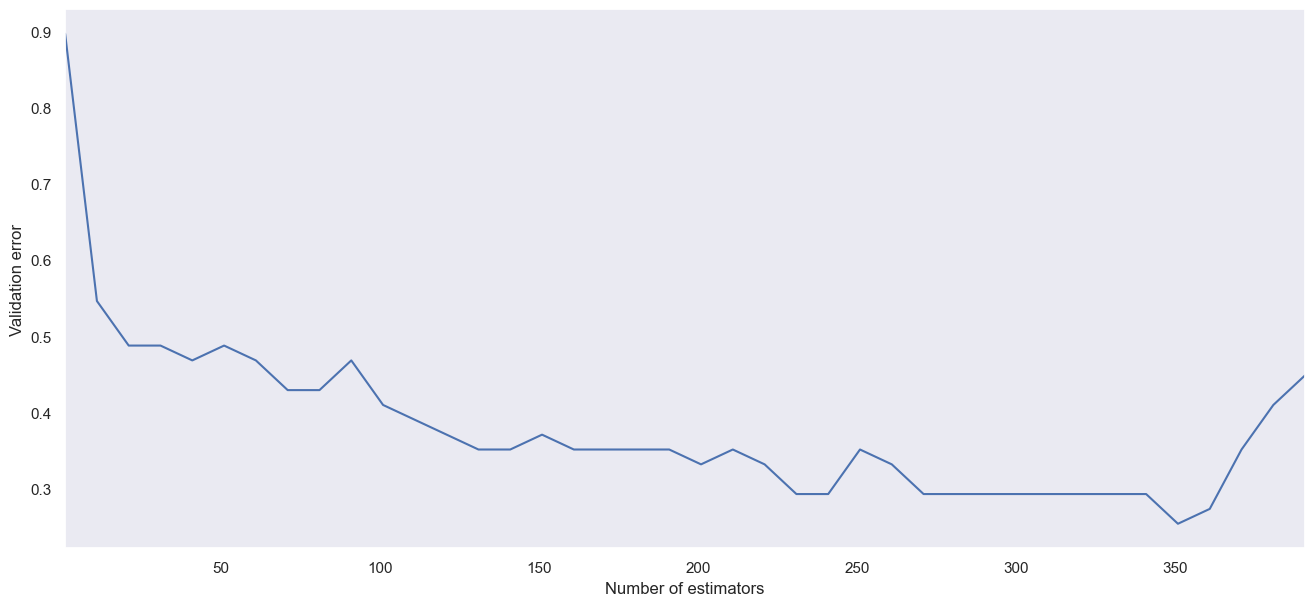

In [52]:
#TODO : Plot validation error versus number of estimators figure.

plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

In [53]:
#TODO : Print the best number for estimators and minimum value for validation error.

print("The best number for estimators is: "+ str(list(result.values()).index(min(list(result.values())))+1))
print("The minimum value for validation error is: "+ str(min(list(result.values()))))

The best number for estimators is: 36
The minimum value for validation error is: 0.25365853658536586


### Weighted Error (10 points)

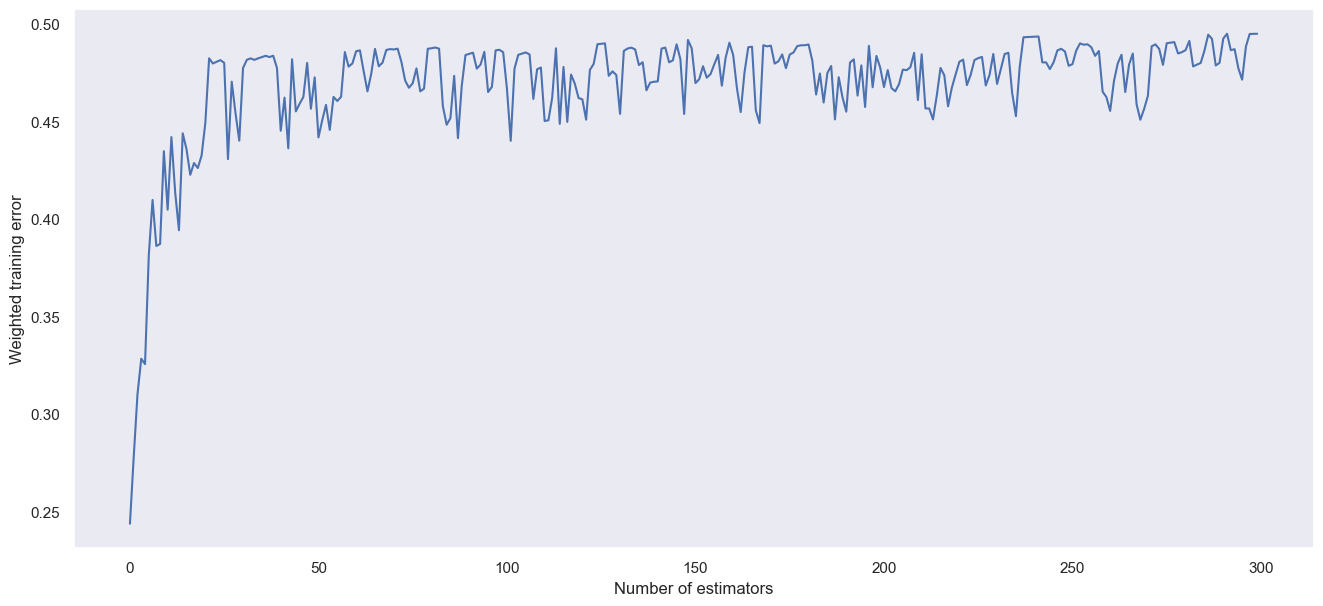

In [63]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.

plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=[ada.training_errors.index(a) for a in ada.training_errors], y=ada.training_errors)
plt.xlabel("Number of estimators")
plt.ylabel("Weighted training error")
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

as the number of estimators increase, we update the weights more and more and In each boosting iteration, we will give more weight to those observations that were misclassified in the previous iteration.